# Code


In [98]:
import sys
!{sys.executable} -m pip install matplotlib

import matplotlib.pyplot as plt
import simulation
import util
import importlib

importlib.reload(simulation)
importlib.reload(util)


<module 'util' from '/Users/cormactaylor/work/personal_projects/coding_projects/traffic_light_intersection_simulation/util.py'>

In [99]:
def plot(partial_f):
    go_thresholds = range(4, 49, 8)
    stopped_spacings = [x / 2 for x in range(1, 129)]

    plots = []
    for thresh in go_thresholds:
        spacing_throughput_basic = lambda space : partial_f (thresh, space)
        throughput = list(map(spacing_throughput_basic, stopped_spacings))
        plots.append((thresh, throughput))

    plt.figure(figsize=(12, 8))

    for (th, plot) in plots:
        plt.plot(stopped_spacings, plot, label=f'go_threshold={th}ft')

    plt.ylim(bottom=0)

    plt.legend()
    plt.xlabel("Space between stoped cars (feet)")
    plt.ylabel("Throughput (cars)")
    plt.title(f'Throughput vs Spacing Given go_threshold')
    plt.grid(True)
    plt.show()


In [100]:
speed_limit = 25                # mph
green_time = 30                 # s
yellow_time_multiple = 0.1      # s/mph
car_length = 16                 # ft
acceleration = 2                # m/s^2

partial_throughput_basic = lambda go_thresh, spacing: simulation.throughput_basic(util.mph_to_mps(speed_limit), green_time, speed_limit * yellow_time_multiple, util.ft_to_m(car_length), util.ft_to_m(spacing), util.ft_to_m(go_thresh), acceleration)

reaction_time = 1.5             # s
partial_throughput_reaction = lambda go_thresh, spacing: simulation.throughput_reaction(util.mph_to_mps(speed_limit), green_time, speed_limit * yellow_time_multiple, util.ft_to_m(car_length), util.ft_to_m(spacing), util.ft_to_m(go_thresh), acceleration, reaction_time)


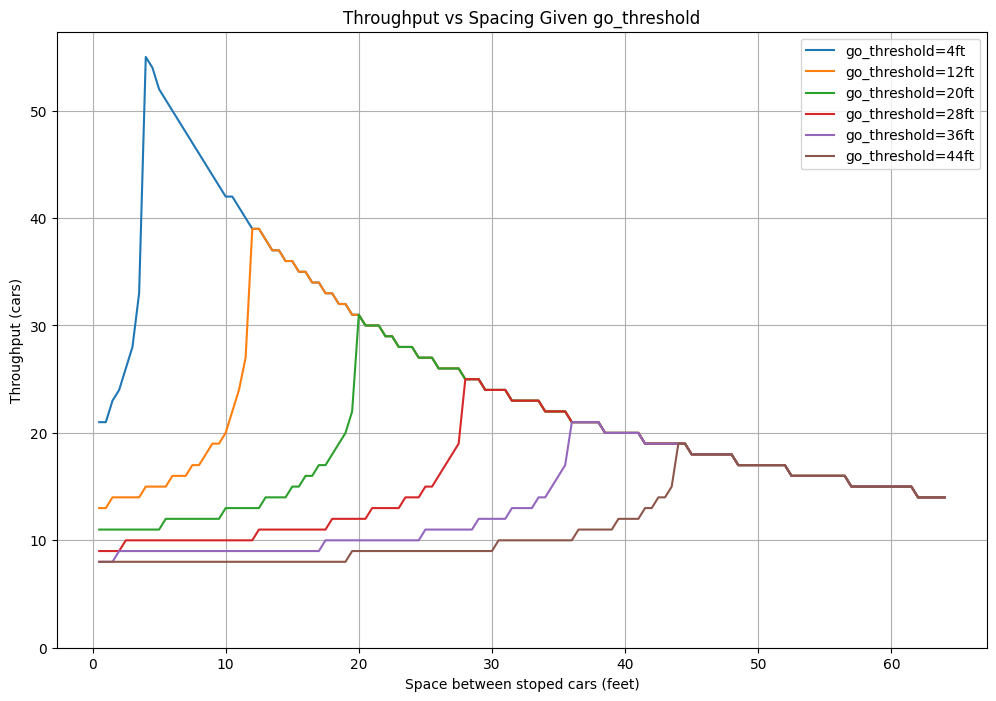

In [101]:
plot(partial_throughput_basic)

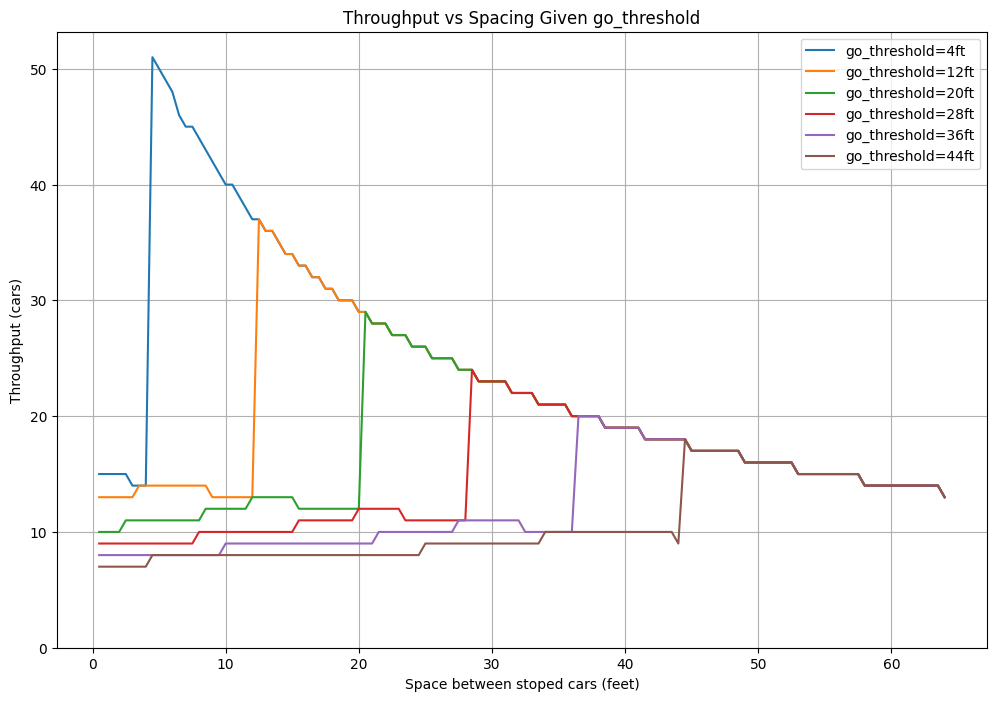

In [102]:
plot(partial_throughput_reaction)

# Analysis

#### Description:
This project aims to investigate the impact of spacing on throughput at a simple traffic light. All the equations were derived by hand using basic kinematics.

#### Assumptions:
I make a collection of simplifying assumptions. The most notable of which follow:
- No deceleration. There is no reason to slow in this model. Cars wait stopped while conditions are non-optimal. This is due to the restrictions of the intersection being modeled -- no turning and no lane changing
- No rolling. Vehicles can only be stopped, accelerating, or at the speed limit.
- No variance. All drivers behave perfectly optimally.

#### Drawbacks of assumptions:
Not all drivers behave optimally. These "bad actors" will cause outsized effects on the possible throughput of the traffic light. The intuition here is that any "bad actor" who jumps on their brakes, is slow to react, or accelerates too slowly, etc. will affect everyone behind them (or possibly in front if obnoxious enough). Considering these common effects could modify the optimal behavior. 

Additionally, since all actors behave the same in this model, optimal behaviors's throughputs are likely magnified on an individual basis. In other words, the first individual who adopts these findings may have negligible effect. Meanwhile, the last one to adopt may see enormous gains.

#### Takeaway
Here we see outsized returns on throughput when drivers give themselves exactly as much room as they feel they need to fully accelerate (aka act as though there is no one in front of them). This is modeled with the "go_threshold", which may be driver-specific which is why it is analyzed. Interestingly, it is far more forgiving to take more room than needed than it is to take too little. This is due to the propagating nature of being too close. In effect, it forces sequentializion when parallelization is otherwise possible. This seems to reaffirm the feeling that we would rather be stuck in 10 mph traffic than be in a traffic wave (aka stop-and-go).

#### Discussion
Full reliance on self-driving vehicles could make the basic modeling rather realistic if there exists a network allowing communication between all vehicles and traffic lights (both vehicle-vehicle and vehicle-traffic light). The network could be used to communicate intentions and thus synchronize behavior. But in this case, the need for a traffic light becomes questionably useful as vehicles could in theory synchronize themselves, although I suspect there will always be human-operated vehicles. 